# K-Means Clustering Example

Let's make some fake data that includes people clustered by income and age, randomly:

In [7]:
from numpy import random, array


# Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    # Set the random seed to 10 for reproducibility
    random.seed(10)
    # Calculate the number of points per cluster
    pointsPerCluster = float(N) / k
    # Initialize an empty list to store the data points
    X = []
    # Loop through the number of clusters
    for i in range(k):
        # Generate a random income centroid between 20,000 and 200,000
        incomeCentroid = random.uniform(20000.0, 200000.0)
        # Generate a random age centroid between 20 and 70
        ageCentroid = random.uniform(20.0, 70.0)
        # Loop through the number of points per cluster
        for j in range(int(pointsPerCluster)):
            # Append a data point with a normal distribution around the income and age centroids
            X.append(
                [
                    random.normal(incomeCentroid, 10000.0),
                    random.normal(ageCentroid, 2.0),
                ]
            )
    # Convert the list of data points to a numpy array
    X = array(X)
    # Return the array of data points
    return X


# Call the function with 12 people and 4 clusters
Y = createClusteredData(12, 4)
# Print the array of data points
print(Y)
# Print the length of the array
print(len(Y))

[[1.72153581e+05 2.24681554e+01]
 [1.43383713e+05 2.10208298e+01]
 [1.65051076e+05 1.95974263e+01]
 [5.30950664e+04 2.46340878e+01]
 [5.04828649e+04 2.40677903e+01]
 [5.47702125e+04 2.68230655e+01]
 [1.52202258e+05 3.54840786e+01]
 [1.38549935e+05 3.48640772e+01]
 [1.64761327e+05 3.24341936e+01]
 [1.02190673e+05 4.64706343e+01]
 [1.10766884e+05 4.50459441e+01]
 [1.00521464e+05 4.44966924e+01]]
12


We'll use k-means to rediscover these clusters in unsupervised learning:

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 2. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2.]


/opt/homebrew/anaconda3/envs/lightTf/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


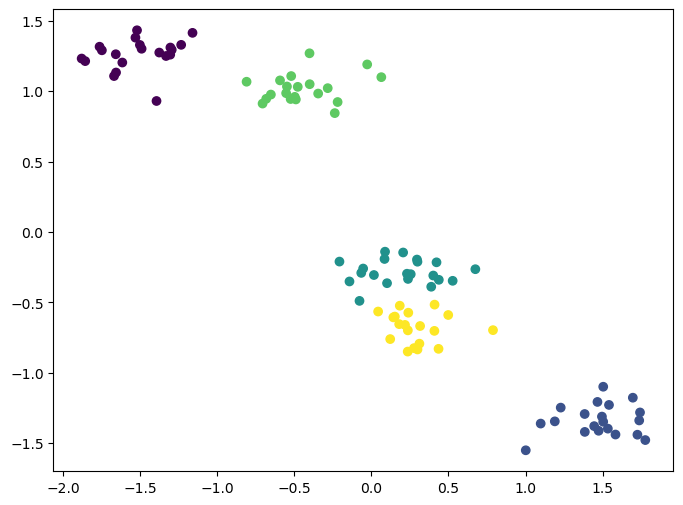

In [8]:
# Import the matplotlib inline magic command to display plots in the notebook
%matplotlib inline

# Import the KMeans class from the sklearn.cluster module
from sklearn.cluster import KMeans
# Import the pyplot module from the matplotlib library and alias it as plt
import matplotlib.pyplot as plt
# Import the scale function from the sklearn.preprocessing module
from sklearn.preprocessing import scale

# Create a dataset of 100 data points in 5 clusters using the createClusteredData function
data = createClusteredData(100, 5)

# Instantiate a KMeans object with 5 clusters
model = KMeans(n_clusters=5)

# Scale the data to normalize it and assign it back to the data variable
# Scaling is important for good results because it reduces the effect of outliers and different scales of features
# Scaling transforms the data to have zero mean and unit variance for each feature
data = scale(data)

# Fit the model to the scaled data
# This will assign each data point to one of the 5 clusters based on the distance to the cluster centroids
model = model.fit(data)

# Print the labels of the clusters assigned to each data point by the model
# The labels are integers from 0 to 4, corresponding to the 5 clusters
print(model.labels_)

print(model.labels_.astype(float))

# Visualize the data and the clusters using a scatter plot
# Set the figure size to 8 by 6 inches
plt.figure(figsize=(8, 6))

# Plot the data points with their x and y coordinates as the first and second features
# Use the cluster labels as the color of the points
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))

# Show the plot
plt.show()

note:

```python
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(float))
```

This line of code uses the pyplot module from the matplotlib library, which is imported as plt, to create a scatter plot of the data and the clusters. A scatter plot is a type of plot that shows the relationship between two variables by using dots to represent the values of the variables for each observation. The arguments of the plt.scatter function are:

- data[:,0]: This is the first feature of the data, which is the income value. The data variable is a numpy array of shape (n_samples, n_features), where n_samples is the number of data points and n_features is the number of features. The [:,0] notation means that we are selecting all the rows and the first column of the array, which corresponds to the income feature.
- data[:,1]: This is the second feature of the data, which is the age value. The data variable is a numpy array of shape (n_samples, n_features), where n_samples is the number of data points and n_features is the number of features. The [:,1] notation means that we are selecting all the rows and the second column of the array, which corresponds to the age feature.
- c=model.labels_.astype(float): This is the color of the dots, which is determined by the cluster labels assigned by the model. The model variable is a KMeans object that has a labels_ attribute, which is a numpy array of shape (n_samples,) that contains the cluster labels for each data point. The labels are integers from 0 to 4, corresponding to the 5 clusters. The astype(float) method converts the labels to floating-point numbers, which are required for the color argument of the plt.scatter function. The color argument determines the color of the dots based on a colormap, which is a mapping from numbers to colors. The default colormap is viridis, which is a perceptually uniform colormap that ranges from yellow to purple. The lower the number, the more yellow the color, and the higher the number, the more purple the color.

The result of this line of code is a scatter plot of the data and the clusters, where the x-axis is the income feature, the y-axis is the age feature, and the color of the dots is the cluster label. The scatter plot shows the distribution and the grouping of the data points based on the income and age features and the cluster centroids.

## Activity

Things to play with: what happens if you don't scale the data? What happens if you choose different values of K? In the real world, you won't know the "right" value of K to start with - you'll need to converge on it yourself.